In [203]:
import time
import csv
from array import array
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Atom Masses
n = 14.003074
o = 15.994915
h = 1.007825
p = 1.007276
car = 12.000000

In [204]:
#Import Amino Acid Sequence
base = '/home/zach/PythonRepos/PyScripts/Other/'
with open(os.path.join(base,'Sequence.txt'),"r") as Seq:
    Sequence = Seq.read() #test
AminoAcids = pd.read_csv(os.path.join(base,'AminoAcids.csv'),header=None,index_col=0,usecols=[0,1],names=['AAs','MSs'])
seq_AAs = []
seq_MSs = []
for aa in Sequence:
    seq_AAs.append(aa)
    seq_MSs.append(AminoAcids.loc[aa][0])
seq_df = pd.DataFrame()
seq_df['AAs'] = seq_AAs
seq_df['MSs'] = seq_MSs
Total_Mass_Two = np.sum(seq_df['MSs']) + o + 2 * h
print("[M+H]+ = ", Total_Mass_Two + p)

[M+H]+ =  30989.469853


In [33]:
Sequence_df = seq_df.copy()
start = time.time()
Fragment_dict = {}
total_length = len(seq_df)
Fragment_dict['N'] = []
Fragment_dict['C'] = []
Sequence_dict = {}
Sequence_dict['N'] = []
Sequence_dict['C'] = []

for length in seq_df.index:
    key = str('I_'+str(length))
    Fragment_dict[key]=[]
    Sequence_dict[key]=[]
    if length==0:
        Fragment_dict['N'].append(np.sum(seq_df['MSs'].loc[0:length]))
        Fragment_dict['C'].append(np.nan) # Same as Full Length
        Sequence_dict['N'].append(''.join(i for i in seq_df['AAs'].loc[0:length]))
        Sequence_dict['C'].append(np.nan) # Same as Full Length
    elif length==total_length:
        Fragment_dict['N'].append(np.nan) # Same as Full Length
        Fragment_dict['C'].append(np.sum(seq_df['MSs'].loc[total_length-length:]))
        Sequence_dict['N'].append(np.nan) # Same as Full Length
        Sequence_dict['C'].append(''.join(i for i in seq_df['AAs'].loc[total_length-length:]))
    else:
        Fragment_dict['N'].append(np.sum(seq_df['MSs'].loc[0:length]))
        Fragment_dict['C'].append(np.sum(seq_df['MSs'].loc[total_length-length:]))
        Sequence_dict['N'].append(''.join(i for i in seq_df['AAs'].loc[0:length]))
        Sequence_dict['C'].append(''.join(i for i in seq_df['AAs'].loc[total_length-length:]))
    for start_site in seq_df.index:
        if start_site==0:
            Fragment_dict[key].append(np.nan) #Same as N term
            Sequence_dict[key].append(np.nan)
        elif start_site==total_length:
            Fragment_dict[key].append(np.nan) #Same as C term
            Sequence_dict[key].append(np.nan)
        elif start_site+length>=total_length:
            Fragment_dict[key].append(np.nan) #Doesnt Exist
            Sequence_dict[key].append(np.nan)
        else:
            Fragment_dict[key].append(np.sum(seq_df['MSs'].loc[start_site:start_site+length]))
            Sequence_dict[key].append(''.join(i for i in seq_df['AAs'].loc[start_site:start_site+length]))
Fragment_dict['C'].reverse()
Sequence_dict['C'].reverse()
for key,item in Fragment_dict.items():
    seq_df[key] = item
    Sequence_df[key] = Sequence_dict[key]
print(time.time()-start)

35.865211725234985


In [175]:
seq_df

,AAs,MSs,N,C,I_0,I_1,I_2,I_3,I_4,I_5,...,I_362,I_363,I_364,I_365,I_366,I_367,I_368,I_369,I_370,I_371
0,G,57.021464,57.021464,30913.430548,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,186.079313,243.100777,30727.351235,186.079313,243.100777,330.132806,458.227769,561.236954,662.284633,...,30076.076711,30205.119305,30306.166984,30407.214663,30494.246692,30622.341655,30725.350840,30826.398519,30913.430548,NaN
2,G,57.021464,300.122241,30670.329771,57.021464,144.053493,272.148456,375.157641,476.205320,563.237349,...,30019.039992,30120.087671,30221.135350,30308.167379,30436.262342,30539.271527,30640.319206,30727.351235,NaN,NaN
3,S,87.032029,387.154270,30583.297742,87.032029,215.126992,318.136177,419.183856,506.215885,577.252999,...,30063.066207,30164.113886,30251.145915,30379.240878,30482.250063,30583.297742,30670.329771,NaN,NaN,NaN
4,K,128.094963,515.249233,30455.202779,128.094963,231.104148,332.151827,419.183856,490.220970,577.252999,...,30077.081857,30164.113886,30292.208849,30395.218034,30496.265713,30583.297742,NaN,NaN,NaN,NaN
5,C,103.009185,618.258418,30352.193594,103.009185,204.056864,291.088893,362.126007,449.158036,506.179500,...,30036.018923,30164.113886,30267.123071,30368.170750,30455.202779,NaN,NaN,NaN,NaN,NaN
6,T,101.047679,719.306097,30251.145915,101.047679,188.079708,259.116822,346.148851,403.170315,516.254379,...,30061.104701,30164.113886,30265.161565,30352.193594,NaN,NaN,NaN,NaN,NaN,NaN
7,S,87.032029,806.338126,30164.113886,87.032029,158.069143,245.101172,302.122636,415.206700,514.275114,...,30063.066207,30164.113886,30251.145915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A,71.037114,877.375240,30093.076772,71.037114,158.069143,215.090607,328.174671,427.243085,484.264549,...,30077.081857,30164.113886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,S,87.032029,964.407269,30006.044743,87.032029,144.053493,257.137557,356.205971,413.227435,512.295849,...,30093.076772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now to make it much faster

In [198]:
def generate_column(frag_type):
    frag_list = []
    seq_list = []
    total_length = len(seq_df.index)
    if frag_type =='N':
        for length in seq_df.index:
            frag_list.append(np.sum(seq_df['MSs'].loc[0:length]))
            seq_list.append(''.join(i for i in seq_df['AAs'].loc[0:length]))
    elif frag_type =='C':
        for length in seq_df.index:
            frag_list.append(np.sum(seq_df['MSs'].loc[total_length-length:]))
            seq_list.append(''.join(i for i in seq_df['AAs'].loc[total_length-length:]))
        frag_list.reverse()
        seq_list.reverse()
    elif 'I' in frag_type:
        length = int(frag_type.split('_')[1])
        for start_site in seq_df.index:
            if start_site==0:
                frag_list.append(np.nan) #Same as N term
                seq_list.append(np.nan)
            elif start_site==total_length:
                frag_list.append(np.nan) #Same as C term
                seq_list.append(np.nan)
            elif start_site+length>=total_length:
                frag_list.append(np.nan) #Doesnt Exist
                seq_list.append(np.nan)
            else:
                frag_list.append(np.sum(seq_df['MSs'].loc[start_site:start_site+length]))
                seq_list.append(''.join(i for i in seq_df['AAs'].loc[start_site:start_site+length]))
    return frag_type,frag_list,seq_list


In [201]:
import multiprocessing
import sys
from functools import partial
start = time.time()
print('building sequence df')
print('calculating molecular weight')
base = '/home/zach/PythonRepos/PyScripts/Other/'
with open(os.path.join(base,'Sequence.txt'),"r") as Seq:
    Sequence = Seq.read() #test
seq_AAs = []
seq_MSs = []
for aa in Sequence:
    seq_AAs.append(aa)
    seq_MSs.append(AminoAcids.loc[aa][0])
seq_df = pd.DataFrame()
seq_df['AAs'] = seq_AAs
seq_df['MSs'] = seq_MSs
global seq_df,AminoAcids    
def Lookup_Wrapper(Sequence,ncpu=4):
    Frag_Result = seq_df.copy()
    Seq_Result = seq_df.copy()
    Input = ['N','C']
    for length in seq_df.index:
        Input.append('I_'+str(length))
    with multiprocessing.Pool(ncpu) as p:
        sys.stdout.flush()
        for frag_type,frag_list,seq_list in p.imap(generate_column,Input, chunksize=1):
            Frag_Result[frag_type] = frag_list
            Seq_Result[frag_type] = seq_list
        p.close()
        sys.stdout.flush()
    return Frag_Result,Seq_Result
Frag_Result,Seq_Result = Lookup_Wrapper(Sequence,ncpu=16)
print(time.time()-start)
Seq_Result

building sequence df
calculating molecular weight
3.1989777088165283


,AAs,MSs,N,C,I_0,I_1,I_2,I_3,I_4,I_5,...,I_362,I_363,I_364,I_365,I_366,I_367,I_368,I_369,I_370,I_371
0,G,57.021464,G,WGSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPG...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,186.079313,GW,GSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGV...,W,WG,WGS,WGSK,WGSKC,WGSKCT,...,WGSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPG...,WGSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPG...,WGSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPG...,WGSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPG...,WGSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPG...,WGSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPG...,WGSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPG...,WGSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPG...,WGSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPG...,NaN
2,G,57.021464,GWG,SKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVG...,G,GS,GSK,GSKC,GSKCT,GSKCTS,...,GSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGV...,GSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGV...,GSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGV...,GSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGV...,GSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGV...,GSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGV...,GSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGV...,GSKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGV...,NaN,NaN
3,S,87.032029,GWGS,KCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGI...,S,SK,SKC,SKCT,SKCTS,SKCTSA,...,SKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVG...,SKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVG...,SKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVG...,SKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVG...,SKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVG...,SKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVG...,SKCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVG...,NaN,NaN,NaN
4,K,128.094963,GWGSK,CTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIP...,K,KC,KCT,KCTS,KCTSA,KCTSAS,...,KCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGI...,KCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGI...,KCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGI...,KCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGI...,KCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGI...,KCTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGI...,NaN,NaN,NaN,NaN
5,C,103.009185,GWGSKC,TSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPG...,C,CT,CTS,CTSA,CTSAS,CTSASG,...,CTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIP...,CTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIP...,CTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIP...,CTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIP...,CTSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIP...,NaN,NaN,NaN,NaN,NaN
6,T,101.047679,GWGSKCT,SASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPGV...,T,TS,TSA,TSAS,TSASG,TSASGL,...,TSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPG...,TSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPG...,TSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPG...,TSASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPG...,NaN,NaN,NaN,NaN,NaN,NaN
7,S,87.032029,GWGSKCTS,ASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPGVG...,S,SA,SAS,SASG,SASGL,SASGLV,...,SASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPGV...,SASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPGV...,SASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPGV...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A,71.037114,GWGSKCTSA,SGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPGVGV...,A,AS,ASG,ASGL,ASGLV,ASGLVG,...,ASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPGVG...,ASGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPGVG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,S,87.032029,GWGSKCTSAS,GLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPGVGVP...,S,SG,SGL,SGLV,SGLVG,SGLVGV,...,SGLVGVPGVGVPGVGIPGVGVPGVGVPGVGVPGVGVPGVGIPGVGV...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
N_Frag_Mod = {}
N_Frag_Mod[''] = 0
N_Frag_Mod['a'] = - car - o
N_Frag_Mod['ap'] = N_Frag_Mod['a']+p
N_Frag_Mod['b'] = 0
N_Frag_Mod['bp'] = N_Frag_Mod['b']+p
N_Frag_Mod['c'] = n + h + h + h
N_Frag_Mod['cp'] = N_Frag_Mod['c']+p
C_Frag_Mod = {}
C_Frag_Mod[''] = 0
C_Frag_Mod['x'] = o + car + o
C_Frag_Mod['xp'] = C_Frag_Mod['x']+p
C_Frag_Mod['y'] = o + h
C_Frag_Mod['yp'] = C_Frag_Mod['y']+p+h
C_Frag_Mod['z'] = o + h - n - h
C_Frag_Mod['zp'] = C_Frag_Mod['z']+p+h

In [93]:
Fragments = pd.read_csv(os.path.join(base,"Fragments.csv"),header=None)
Fragments.columns = ['Fragment']
Fragments

,Fragment
0,1242.720345
1,1228.704703
2,1651.956900
3,819.470518
4,2061.184415
5,1398.812404
6,1072.614454
7,1129.636080
8,1905.094516
9,989.576849


In [37]:
Modifications = pd.read_csv(os.path.join(base,"Modifications.csv"),header=None)
Modifications

,0,1
0,0,None


In [133]:
def match_peaks(Fragment,shift,mod,frag_array,seq_array):
    Fragment -= shift
    diff_array = np.abs(np.subtract(Fragment,frag_array))
    Error = np.nanmin(diff_array)
    x,y = np.where(diff_array==Error)
    seqs = [i+'_'+mod for i in seq_array[x,y]]
    return Error,seqs,x,y

In [134]:
def seq_mod1_mod2_to_peak(result,N_Frag_Mod,C_Frag_Mod):
    seq,mod1,mod2 = result.split('_')
    peak = []
    for aa in seq:
        peak.append(AminoAcids.loc[aa])
    peak.append(N_Frag_Mod[mod1])
    peak.append(C_Frag_Mod[mod2])
    return np.sum(peak)

In [144]:
def calc_end_length(start_sites,Assignment):
    end_sites = []
    length = []
    for i,ss in enumerate(start_sites):
        l = len(Assignment[i])
        length.append(l)
        end_sites.append(ss+l)
    return end_sites,length

In [154]:
start = time.time()
frag_array = np.array(seq_df.drop(columns='AAs'))
seq_array = np.array(Sequence_df.drop(columns='MSs'))
min_Errors = []
Assignments = []
Calculated = []
Start_sites = []
End_sites = []
Length = []
for Fragment in Fragments['Fragment']:
    Errors = []
    Seqs = []
    X = []
    Y = []
    for mod1,shift1 in N_Frag_Mod.items():
        for mod2,shift2 in C_Frag_Mod.items():
            mod = mod1+'_'+mod2
            shift = shift1+shift2
            Error,seqs,x,y = match_peaks(Fragment,shift,mod,frag_array,seq_array)
            X.append(x)
            Y.append(y)
            Errors.append(Error)
            Seqs.append(seqs)
    min_Error = np.min(Errors)
    Assignment = Seqs[np.where(Errors==min_Error)[0][0]]
    calc_peaks = seq_mod1_mod2_to_peak(Assignment[0],N_Frag_Mod,C_Frag_Mod)[0]
    start_sites = X[np.where(Errors==min_Error)[0][0]]
    end_sites,length = calc_end_length(start_sites,Assignment)
    min_Errors.append(min_Error)
    Assignments.append(Assignment)
    Calculated.append(calc_peaks)
    Start_sites.append(start_sites)
    End_sites.append(end_sites)
    Length.append(length)
Fragments['min_Errors'] = min_Errors
Fragments['Assignments'] = Assignments
Fragments['Calculated'] = Calculated
Fragments['Start_sites'] = Start_sites
Fragments['End_sites'] = End_sites
Fragments['Length'] = Length
print(time.time()-start)
Fragments

27.45963740348816


,Fragment,min_Errors,Assignments,Calculated,Start_sites,End_sites,Length
0,1242.720345,0.000141,"[VGVPGVGVPGVGIPG_bp_, VPGVGVPGVGIPGVG_bp_, VGV...",1242.720486,"[12, 14, 17, 18, 19, 22, 23, 24, 35, 36, 37, 3...","[31, 33, 36, 37, 38, 41, 42, 43, 54, 55, 56, 5...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1..."
1,1228.704703,0.000133,"[PGVGVPGVGVPGVGV_bp_, GVGVPGVGVPGVGVP_bp_, VGV...",1228.704836,"[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 50, 5...","[44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 69, 7...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1..."
2,1651.956900,0.003894,"[GVPGVGVPGVGIPGVGVPGV_bp_, GIPGVGVPGVGVPGVGVPG...",1651.953006,"[13, 23, 38, 48, 63, 73, 88, 98, 113, 123, 138...","[37, 47, 62, 72, 87, 97, 112, 122, 137, 147, 1...","[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2..."
3,819.470518,0.001798,"[GVGVPGVGVP_bp_, GVGVPGVGVP_bp_, GVGVPGVGVP_bp...",819.472316,"[26, 31, 36, 51, 56, 61, 76, 81, 86, 101, 106,...","[40, 45, 50, 65, 70, 75, 90, 95, 100, 115, 120...","[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1..."
4,2061.184415,0.001111,"[VGVPGVGVPGVGIPGVGVPGVGVPG_bp_, GVPGVGVPGVGIPG...",2061.185526,"[12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2...","[41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2..."
5,1398.812404,0.002040,"[GVPGVGVPGVGIPGVGV_bp_, GIPGVGVPGVGVPGVGV_bp_,...",1398.810364,"[13, 23, 38, 48, 63, 73, 88, 98, 113, 123, 138...","[34, 44, 59, 69, 84, 94, 109, 119, 134, 144, 1...","[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2..."
6,1072.614454,0.000504,"[PGVGVPGVGVPGV_bp_, GVPGVGVPGVGVP_bp_, VPGVGVP...",1072.614958,"[25, 28, 29, 30, 33, 34, 35, 50, 53, 54, 55, 5...","[42, 45, 46, 47, 50, 51, 52, 67, 70, 71, 72, 7...","[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 1..."
7,1129.636080,0.000342,"[PGVGVPGVGVPGVG_bp_, GVPGVGVPGVGVPG_bp_, PGVGV...",1129.636422,"[25, 28, 30, 33, 35, 50, 53, 55, 58, 60, 75, 7...","[43, 46, 48, 51, 53, 68, 71, 73, 76, 78, 93, 9...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1..."
8,1905.094516,0.001132,"[VPGVGVPGVGVPGVGVPGVGIPG_bp_, VPGVGVPGVGVPGVGV...",1905.095648,"[29, 54, 79, 104, 129, 154, 179, 204, 229, 254...","[56, 81, 106, 131, 156, 181, 206, 231, 256, 28...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
9,989.576849,0.000995,"[GLVGVPGVGVPG_bp_, GVGVPGVGIPGV_bp_, VGVPGVGIP...",989.577844,"[10, 16, 17, 18, 21, 22, 23, 41, 42, 43, 46, 4...","[26, 32, 33, 34, 37, 38, 39, 57, 58, 59, 62, 6...","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1..."


Now to make it much faster Or not

In [167]:
def find_best_match(Fragment):
    Errors = []
    Seqs = []
    X = []
    Y = []
    for mod1,shift1 in N_Frag_Mod.items():
        for mod2,shift2 in C_Frag_Mod.items():
            mod = mod1+'_'+mod2
            shift = shift1+shift2
            Error,seqs,x,y = match_peaks(Fragment,shift,mod,frag_array,seq_array)
            X.append(x)
            Y.append(y)
            Errors.append(Error)
            Seqs.append(seqs)
    min_Error = np.min(Errors)
    Assignment = Seqs[np.where(Errors==min_Error)[0][0]]
    calc_peaks = seq_mod1_mod2_to_peak(Assignment[0],N_Frag_Mod,C_Frag_Mod)[0]
    start_sites = X[np.where(Errors==min_Error)[0][0]]
    end_sites,length = calc_end_length(start_sites,Assignment)
    
    return Fragment,min_Error,Assignment,calc_peaks,start_sites,end_sites,length

In [183]:
import multiprocessing
import sys
global N_Frag_Mod,C_Frag_Mod,frag_array,seq_array
start = time.time()
def match_wrapper(Fragments,seq_df,Sequence_df,ncpu=4):
    Fragment_list = []
    min_Errors = []
    Assignments = []
    Calculated = []
    Start_sites = []
    End_sites = []
    Length = []
    frag_array = np.array(seq_df.drop(columns='AAs'))
    seq_array = np.array(Sequence_df.drop(columns='MSs'))
    Input = Fragments['Fragment']
    with multiprocessing.Pool(ncpu) as p:
        sys.stdout.flush()
        for Fragment,min_Error,Assignment,calc_peaks,start_sites,end_sites,length in p.imap(find_best_match,Input, chunksize=1):
            Fragment_list.append(Fragment)
            min_Errors.append(min_Error)
            Assignments.append(Assignment)
            Calculated.append(calc_peaks)
            Start_sites.append(start_sites)
            End_sites.append(end_sites)
            Length.append(length)
        p.close()
        sys.stdout.flush()
    Results = pd.DataFrame()
    Results['Fragment'] = Fragment_list
    Results['Error'] = min_Errors
    Results['Assignment'] = Assignments
    Results['Calculated'] = Calculated
    Results['Start_site'] = Start_sites
    Results['End_site'] = End_sites
    Results['Length'] = Length
    return Results
Results = match_wrapper(Fragments,seq_df,Sequence_df,ncpu=4)
print(time.time()-start)
Results


7.884495258331299


,Fragment,Error,Assignment,Calculated,Start_site,End_site,Length
0,1242.720345,0.000141,"[VGVPGVGVPGVGIPG_bp_, VPGVGVPGVGIPGVG_bp_, VGV...",1242.720486,"[12, 14, 17, 18, 19, 22, 23, 24, 35, 36, 37, 3...","[31, 33, 36, 37, 38, 41, 42, 43, 54, 55, 56, 5...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1..."
1,1228.704703,0.000133,"[PGVGVPGVGVPGVGV_bp_, GVGVPGVGVPGVGVP_bp_, VGV...",1228.704836,"[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 50, 5...","[44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 69, 7...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1..."
2,1651.956900,0.003894,"[GVPGVGVPGVGIPGVGVPGV_bp_, GIPGVGVPGVGVPGVGVPG...",1651.953006,"[13, 23, 38, 48, 63, 73, 88, 98, 113, 123, 138...","[37, 47, 62, 72, 87, 97, 112, 122, 137, 147, 1...","[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2..."
3,819.470518,0.001798,"[GVGVPGVGVP_bp_, GVGVPGVGVP_bp_, GVGVPGVGVP_bp...",819.472316,"[26, 31, 36, 51, 56, 61, 76, 81, 86, 101, 106,...","[40, 45, 50, 65, 70, 75, 90, 95, 100, 115, 120...","[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1..."
4,2061.184415,0.001111,"[VGVPGVGVPGVGIPGVGVPGVGVPG_bp_, GVPGVGVPGVGIPG...",2061.185526,"[12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2...","[41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2..."
5,1398.812404,0.002040,"[GVPGVGVPGVGIPGVGV_bp_, GIPGVGVPGVGVPGVGV_bp_,...",1398.810364,"[13, 23, 38, 48, 63, 73, 88, 98, 113, 123, 138...","[34, 44, 59, 69, 84, 94, 109, 119, 134, 144, 1...","[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2..."
6,1072.614454,0.000504,"[PGVGVPGVGVPGV_bp_, GVPGVGVPGVGVP_bp_, VPGVGVP...",1072.614958,"[25, 28, 29, 30, 33, 34, 35, 50, 53, 54, 55, 5...","[42, 45, 46, 47, 50, 51, 52, 67, 70, 71, 72, 7...","[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 1..."
7,1129.636080,0.000342,"[PGVGVPGVGVPGVG_bp_, GVPGVGVPGVGVPG_bp_, PGVGV...",1129.636422,"[25, 28, 30, 33, 35, 50, 53, 55, 58, 60, 75, 7...","[43, 46, 48, 51, 53, 68, 71, 73, 76, 78, 93, 9...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1..."
8,1905.094516,0.001132,"[VPGVGVPGVGVPGVGVPGVGIPG_bp_, VPGVGVPGVGVPGVGV...",1905.095648,"[29, 54, 79, 104, 129, 154, 179, 204, 229, 254...","[56, 81, 106, 131, 156, 181, 206, 231, 256, 28...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
9,989.576849,0.000995,"[GLVGVPGVGVPG_bp_, GVGVPGVGIPGV_bp_, VGVPGVGIP...",989.577844,"[10, 16, 17, 18, 21, 22, 23, 41, 42, 43, 46, 4...","[26, 32, 33, 34, 37, 38, 39, 57, 58, 59, 62, 6...","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1..."


In [150]:
def position2sequence(position,fragment_type,seq_df,mod):
    sequence = []
    for pos in position:
        if fragment_type == 'N':
            sequence.append(''.join(i for i in seq_df['AAs'].iloc[0:pos])+'_'+mod)
        elif fragment_type == 'C':
            sequence.append(''.join(i for i in seq_df['AAs'].iloc[pos:])+'_'+mod)
        elif fragment_type == 'MSs':
            sequence.append(seq_df['AAs'].iloc[position]+'_'+mod)
        else:
            length = int(fragment_type.split('_')[1])
            sequence.append(''.join(i for i in seq_df['AAs'].iloc[pos:pos+length])+'_'+mod)
    return sequence

In [151]:
def find_best_match(fragment,mod,shift,frag_array,seq_df):
    peak = fragment-shift
    error_array = np.abs(frag_array-peak)
    min_error = np.nanmin(error_array)
    x,y = np.where(error_array==min_error)
    position = x
    tpe = seq_df.columns[y+1][0]
    error = min_error
    ppm = frag_array[x,y]+shift
    sequence = position2sequence(position,tpe,seq_df,mod)
    return position,tpe,error,ppm,sequence


In [152]:
start = time.time()
Position = {}
Type = {}
Error = {}
PPM = {}
Sequence = {}
for key1 in N_Frag_Mod.keys():
    Position[key1]=[]
    Type[key1]=[]
    Error[key1]=[]
    PPM[key1]=[]
    Sequence[key1]=[]
    for key2 in C_Frag_Mod.keys():
        Position[str(key2+key1)]=[]
        Type[str(key2+key1)]=[]
        Error[str(key2+key1)]=[]
        PPM[str(key2+key1)]=[]
        Sequence[str(key2+key1)]=[]
for key1 in C_Frag_Mod.keys():
    Position[key1]=[]
    Type[key1]=[]
    Error[key1]=[]
    PPM[key1]=[]
    Sequence[key1]=[]

frag_array = np.array(seq_df.drop(columns='AAs'))
seq_array = np.array(seq_df.drop(columns='MSs'))
for fragment in Fragments['Fragment']:
    for mod1,shift1 in N_Frag_Mod.items():
        position,tpe,error,ppm,sequence = find_best_match(fragment,mod1,shift1,frag_array,seq_df)
        Position[mod1].append(position)
        Type[mod1].append(tpe)
        Error[mod1].append(error)
        PPM[mod1].append(ppm)
        Sequence[mod1].append(sequence)
        for mod2,shift2 in C_Frag_Mod.items():
            key = str(mod2+mod1)
            position,tpe,error,ppm,sequence = find_best_match(fragment,key,shift1+shift2,frag_array,seq_df)
            Position[key].append(position)
            Type[key].append(tpe)
            Error[key].append(error)
            PPM[key].append(ppm)
            Sequence[key].append(sequence)
    for mod1,shift1 in C_Frag_Mod.items():
        position,tpe,error,ppm,sequence = find_best_match(fragment,mod1,shift1,frag_array,seq_df)
        Position[mod1].append(position)
        Type[mod1].append(tpe)
        Error[mod1].append(error)
        PPM[mod1].append(ppm)
        Sequence[mod1].append(sequence)
print(time.time()-start)

81.25036001205444


In [476]:
Fragments_Postion = Fragments.copy()
Fragments_Type = Fragments.copy()
Fragments_Error = Fragments.copy()
Fragments_PPM = Fragments.copy()
Fragments_Sequence = Fragments.copy()
for key,data in Position.items():
    Fragments_Postion[key] = data
for key,data in Type.items():
    Fragments_Type[key] = data
for key,data in Error.items():
    Fragments_Error[key] = data
for key,data in PPM.items():
    Fragments_PPM[key] = data
for key,data in Sequence.items():
    Fragments_Sequence[key] = data

In [477]:
final_postion = []
final_type = []
final_error = []
final_ppm = []
final_sequence = []
for index,row in Fragments_Error.iterrows():
    min_error = np.min(row)
    key = row[row==min_error].index[0]
    final_postion.append(Fragments_Postion[key].loc[index])
    final_type.append(Fragments_Type[key].loc[index])
    final_error.append(Fragments_Error[key].loc[index])
    final_ppm.append(Fragments_PPM[key].loc[index])
    final_sequence.append(Fragments_Sequence[key].loc[index])
Fragments['Sequence'] = final_sequence
Fragments['error'] = final_error
Fragments['ppm'] = final_ppm
Fragments['type'] = final_type
Fragments['position'] = final_postion


In [478]:
Fragments

,0,Sequence,error,ppm,type,position
0,1242.720345,"[VGVPGVG_bp, VPGVGVP_bp, VGVPGVG_bp, GVPGVGI_b...",0.000141,"[1242.720486, 1242.720486, 1242.720486, 1242.7...",I_14,"[12, 14, 17, 18, 19, 22, 23, 24, 35, 36, 37, 3..."
1,1228.704703,"[PGVGVPG_bp, GVGVPGV_bp, VGVPGVG_bp, GVPGVGV_b...",0.000133,"[1228.7048360000001, 1228.7048360000001, 1228....",I_14,"[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 50, 5..."
2,1651.956900,"[GVPGVGV_bp, GIPGVGV_bp, GVPGVGV_bp, GIPGVGV_b...",0.003894,"[1651.9530060000002, 1651.9530060000002, 1651....",I_19,"[13, 23, 38, 48, 63, 73, 88, 98, 113, 123, 138..."
3,819.470518,"[GVGVPGV_bp, GVGVPGV_bp, GVGVPGV_bp, GVGVPGV_b...",0.001798,"[819.472316, 819.472316, 819.472316, 819.47231...",I_9,"[26, 31, 36, 51, 56, 61, 76, 81, 86, 101, 106,..."
4,2061.184415,"[VGVPGVG_bp, GVPGVGV_bp, PGVGVPG_bp, GVGVPGV_b...",0.001111,"[2061.1855259999998, 2061.1855259999998, 2061....",I_24,"[12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2..."
5,1398.812404,"[GVPGVGV_bp, GIPGVGV_bp, GVPGVGV_bp, GIPGVGV_b...",0.002040,"[1398.8103640000002, 1398.8103640000002, 1398....",I_16,"[13, 23, 38, 48, 63, 73, 88, 98, 113, 123, 138..."
6,1072.614454,"[PGVGVPG_bp, GVPGVGV_bp, VPGVGVP_bp, PGVGVPG_b...",0.000504,"[1072.6149580000001, 1072.6149580000001, 1072....",I_12,"[25, 28, 29, 30, 33, 34, 35, 50, 53, 54, 55, 5..."
7,1129.636080,"[PGVGVPG_bp, GVPGVGV_bp, PGVGVPG_bp, GVPGVGV_b...",0.000342,"[1129.636422, 1129.636422, 1129.636422, 1129.6...",I_13,"[25, 28, 30, 33, 35, 50, 53, 55, 58, 60, 75, 7..."
8,1905.094516,"[VPGVGVP_bp, VPGVGVP_bp, VPGVGVP_bp, VPGVGVP_b...",0.001132,"[1905.0956479999998, 1905.0956479999998, 1905....",I_22,"[29, 54, 79, 104, 129, 154, 179, 204, 229, 254..."
9,989.576849,"[GLVGVPG_bp, GVGVPGV_bp, VGVPGVG_bp, GVPGVGI_b...",0.000995,"[989.577844, 989.577844, 989.577844, 989.57784...",I_11,"[10, 16, 17, 18, 21, 22, 23, 41, 42, 43, 46, 4..."


In [489]:
seq = 'VGVPGVG'
ppm = 0
for aa in seq:
    ppm+=AminoAcids.loc[aa]
# ppm+C_Frag_Mod['xp']
ppm+=N_Frag_Mod['bp']
print(ppm)

MSs    566.329674
Name: V, dtype: float64


In [488]:
N_Frag_Mod['bp']

1.007276

In [484]:
for aa in seq

,MSs
AAs,
A,71.037114
R,156.101111
N,114.042928
D,115.026944
C,103.009185
E,129.042594
Q,128.058578
G,57.021464
H,137.058912


In [479]:
Fragments.loc[0]

0                                                     1242.72
Sequence    [VGVPGVG_bp, VPGVGVP_bp, VGVPGVG_bp, GVPGVGI_b...
error                                                0.000141
ppm         [1242.720486, 1242.720486, 1242.720486, 1242.7...
type                                                     I_14
position    [12, 14, 17, 18, 19, 22, 23, 24, 35, 36, 37, 3...
Name: 0, dtype: object

In [455]:
fragment = Fragments[0].loc[index]
shift = C_Frag_Mod['xp']+N_Frag_Mod['b']
# def find_best_match(fragment,mod,shift,frag_array,seq_df):
peak = fragment-shift
print(peak)
error_array = np.abs(frag_array-peak)
min_error = np.nanmin(error_array)
x,y = np.where(error_array==min_error)
for i,a in enumerate(x):
    position = x[i]
    tpe = seq_df.columns[y[i]+1][0]
    error = min_error
    ppm = frag_array[x[i],y[i]]+shift
    sequence = position2sequence(position,fragment_type,seq_df,mod)
    print(sequence,ppm)
#     return position,tpe,error,ppm,sequence
# position,tpe,error,ppm,sequence = find_best_match(fragment,mod1,shift1,frag_array,seq_df)


707.89704
SASGLVG_xpb 753.308349
TTSKCTS_xpb 753.308349


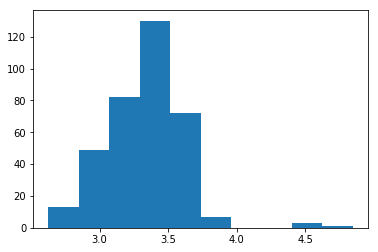

In [482]:
import matplotlib.pyplot as plt
plt.hist(np.log10(Fragments[0]),bins=10)
plt.show()

In [2]:
frag = pd.read_csv('/home/zach/PythonRepos/PyScripts/Other/LooCode/Matched_Fragments_V2_TD.csv',index_col=0)
frag

,Frag_number,Frag Type,Modification,Term Mod,Observed Mass,Theoredical Mass,Start AA,End AA,Error,Sequence
0,1,A Fragment,0.0000,42.01056,2204.99341,2162.980469,1,18,1.079936,DKHWHEPGNHKGYGWHHS
1,2,A Fragment,0.0000,42.01056,3217.50263,3175.489502,1,27,0.798150,QREGNAIPFDKHWHEPGNHKGYGWHHS
6,7,C Fragment,0.0000,42.01056,13759.74368,13717.722660,1,121,0.760462,HVLHLEAAYKKRDVTHESGQDDSSGWHFHFQVLRYTGTLPGDKLVA...
7,8,Y Fragment,0.0000,0.00000,4953.62169,4953.624512,218,259,-0.569627,SQQMLKFRTLNFNAEGEPELLMLANWRPAQPLKNRQVRGFPK
9,10,Y Fragment,0.0000,0.00000,8439.45888,8439.461914,187,259,-0.359509,LDYWTYPGSLTTPPLLESVTWIVLKEPISVSSQQMLKFRTLNFNAE...
13,14,Z Fragment,0.0000,0.00000,1326.78696,1326.787842,249,259,-0.664610,LKNRQVRGFPK
15,16,Z Fragment,0.0000,0.00000,6003.24365,6003.249023,208,259,-0.895088,IVLKEPISVSSQQMLKFRTLNFNAEGEPELLMLANWRPAQPLKNRQ...
22,23,AY Fragment,0.0000,0.00000,982.47952,982.482056,104,111,-2.580876,SEHTVDRK
34,35,AY Fragment,0.0000,0.00000,2780.26627,2780.256104,54,77,3.656672,TSRRMVNNGHSFNVEYDDSQDKAV
43,44,AY Fragment,0.0000,0.00000,4150.89377,4150.928223,66,101,-8.299988,NVEYDDSQDKAVLKDGPLTGTYRLVQFHFHWGSSDD


In [3]:
with open('/home/zach/PythonRepos/PyScripts/Other/LooCode/Sequence.txt','r') as file:
    seq = file.read()
seq

'SHHWGYGKHNGPEHWHKDFPIANGERQSPVDIDTKAVVQDPALKPLALVYGEATSRRMVNNGHSFNVEYDDSQDKAVLKDGPLTGTYRLVQFHFHWGSSDDQGSEHTVDRKKYAAELHLVHWNTKYGDFGTAAQQPDGLAVVGVFLKVGDANPALQKVLDALDSIKTKGKSTDFPNFDPGSLLPNVLDYWTYPGSLTTPPLLESVTWIVLKEPISVSSQQMLKFRTLNFNAEGEPELLMLANWRPAQPLKNRQVRGFPK'

In [4]:
np.unique(frag['Start AA'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  12,  15,  17,  23,
        24,  25,  26,  27,  28,  29,  33,  35,  36,  38,  45,  47,  50,
        52,  53,  54,  55,  56,  57,  61,  62,  63,  66,  69,  70,  73,
        75,  78,  79,  81,  82,  84,  86,  88,  89,  90,  95,  96,  99,
       104, 107, 108, 112, 117, 118, 119, 121, 123, 124, 129, 130, 132,
       133, 134, 135, 136, 138, 139, 141, 142, 145, 146, 147, 148, 151,
       152, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 167, 168,
       172, 176, 183, 185, 186, 187, 188, 189, 190, 192, 194, 195, 196,
       198, 204, 206, 208, 212, 218, 219, 229, 230, 231, 236, 239, 244,
       249, 253])

In [14]:
start_aa = np.unique(frag['Start AA'])
end_aa = np.unique(frag['End AA'])
master_string = []

for i,aa in enumerate(seq):
    if i %20 ==0:
        master_string.append(' \n ')
    master_string.append(r'\textcolor{black}{'+str(aa)+'}')
    if i in start_aa:
        master_string.append(r'\textcolor{red}{|}')
    elif i in end_aa:
        master_string.append(r'\textcolor{red}{|}')
annotated = ''.join(i for i in master_string)
annotated

' \n \\textcolor{black}{S}\\textcolor{black}{H}\\textcolor{red}{|}\\textcolor{black}{H}\\textcolor{red}{|}\\textcolor{black}{W}\\textcolor{red}{|}\\textcolor{black}{G}\\textcolor{red}{|}\\textcolor{black}{Y}\\textcolor{red}{|}\\textcolor{black}{G}\\textcolor{red}{|}\\textcolor{black}{K}\\textcolor{red}{|}\\textcolor{black}{H}\\textcolor{red}{|}\\textcolor{black}{N}\\textcolor{red}{|}\\textcolor{black}{G}\\textcolor{black}{P}\\textcolor{black}{E}\\textcolor{red}{|}\\textcolor{black}{H}\\textcolor{black}{W}\\textcolor{black}{H}\\textcolor{red}{|}\\textcolor{black}{K}\\textcolor{red}{|}\\textcolor{black}{D}\\textcolor{red}{|}\\textcolor{black}{F}\\textcolor{red}{|}\\textcolor{black}{P} \n \\textcolor{black}{I}\\textcolor{black}{A}\\textcolor{black}{N}\\textcolor{black}{G}\\textcolor{red}{|}\\textcolor{black}{E}\\textcolor{red}{|}\\textcolor{black}{R}\\textcolor{red}{|}\\textcolor{black}{Q}\\textcolor{red}{|}\\textcolor{black}{S}\\textcolor{red}{|}\\textcolor{black}{P}\\textcolor{red}{|}\\

In [30]:
start_aa = np.unique(frag['Start AA'])
end_aa = np.unique(frag['End AA'])
master_string = []
colors = []
for i,aa in enumerate(seq):
#     if i %20 ==0:
#         master_string.append(' \n ')
#         colors.append('k')
    master_string.append(aa)
    colors.append('black')
    if i in start_aa:
        master_string.append('|')
        colors.append('red')
    elif i in end_aa:
        master_string.append('|')
        colors.append('red')
annotated = ''.join(i for i in master_string)
annotated

'SH|H|W|G|Y|G|K|H|N|GPE|HWH|K|D|F|PIANG|E|R|Q|S|P|V|DIDT|KA|V|VQ|DPALKPL|AL|VYG|EA|T|S|R|R|M|VN|N|G|H|S|FNV|EYD|D|S|Q|D|KA|V|L|K|D|GP|L|TG|T|Y|R|L|V|Q|FH|FHW|G|S|SD|D|Q|G|SE|HT|V|D|RK|K|Y|AAELH|L|V|H|W|NT|K|Y|G|DF|G|T|AA|Q|Q|P|D|G|L|A|V|V|G|V|FL|K|V|G|DAN|P|A|L|Q|K|V|L|DA|L|D|S|I|K|T|K|G|K|STD|FPNF|DP|GSLL|P|NV|L|D|Y|W|T|YP|G|S|L|T|TP|PL|LESV|TW|IV|L|K|E|P|I|SV|SS|Q|Q|M|LKF|R|T|L|N|F|N|A|E|GE|P|EL|LM|L|ANWRP|AQPL|K|N|RQ|V|R|G|F|P|K|'

<IPython.core.display.Javascript object>


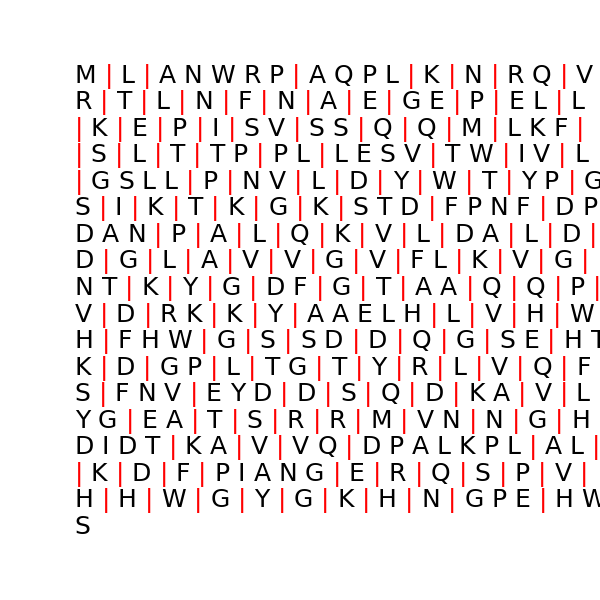

In [46]:
import matplotlib.pyplot as plt
from matplotlib import transforms
def rainbow_text(x, y, strings, colors, orientation='horizontal',
                 ax=None, **kwargs):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].

    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    canvas = ax.figure.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='bottom')

    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        if orientation == 'horizontal':
            t = transforms.offset_copy(
                text.get_transform(), x=ex.width, units='dots')
        else:
            t = transforms.offset_copy(
                text.get_transform(), y=ex.height, units='dots')


words = master_string
plt.figure(figsize=(6, 6))
temp_words = []
temp_colors = []
length = len(words)
step = 25
lines = (1/(length/step))
for i,word in enumerate(words):
    temp_words.append(word)
    temp_colors.append(colors[i])
    if i%step==0:
        rainbow_text(0, lines*(i/step), temp_words, temp_colors, size=18)
        temp_words = []
        temp_colors = []
plt.axis('off')
plt.show()


<IPython.core.display.Javascript object>


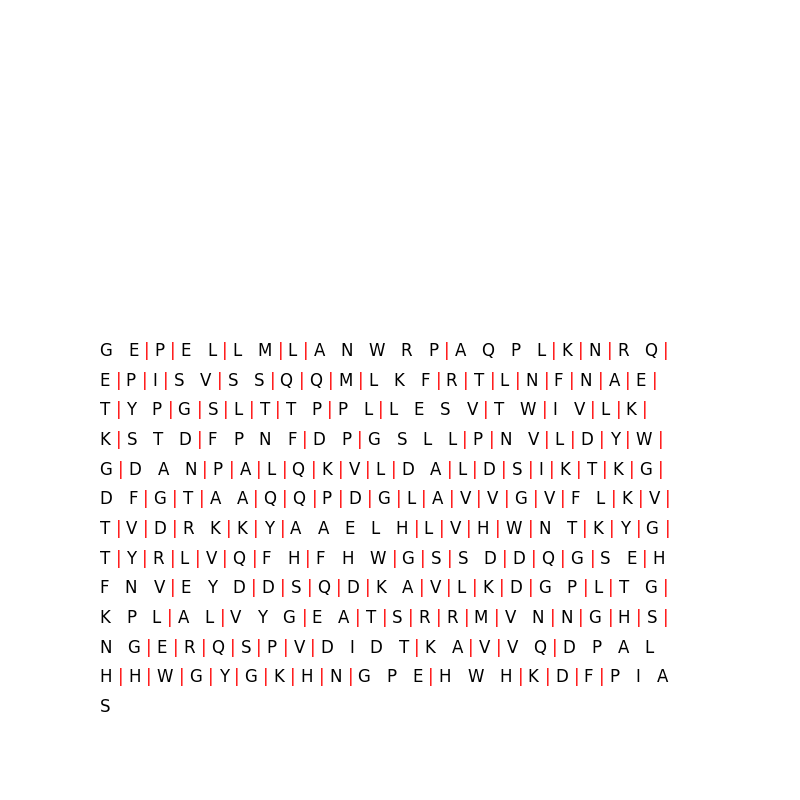

In [74]:
words = master_string
plt.figure(figsize=(8,8))
temp_words = []
temp_colors = []
frag_loc = list(np.unique(frag['Start AA']))
frag_loc.extend(list(np.unique(frag['End AA'])))
frag_loc = np.unique(frag_loc)
length = len(seq)+len(frag_loc)
step = 21
lines = (1/(length/step))
temp_words = []
temp_colors = []
for i,aa in enumerate(seq):
    temp_words.append(aa)
    temp_colors.append('black')
    if i in frag_loc:
        temp_words.append('|')
        temp_colors.append('red')
    else:
        temp_words.append(' ')
        temp_colors.append('black')
    if i%step==0:
        rainbow_text(0, lines*(i/step), temp_words, temp_colors, size=12)
        temp_words = []
        temp_colors = []
plt.axis('off')
plt.show()

In [54]:
frag_loc = list(np.unique(frag['Start AA']))
frag_loc.extend(list(np.unique(frag['End AA'])))
frag_loc = np.unique(frag_loc)
frag_loc
                

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  12,  15,  16,  17,
        18,  23,  24,  25,  26,  27,  28,  29,  33,  35,  36,  38,  45,
        47,  50,  52,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,
        66,  69,  70,  71,  72,  73,  75,  76,  77,  78,  79,  81,  82,
        84,  85,  86,  87,  88,  89,  90,  92,  95,  96,  97,  99, 100,
       101, 102, 104, 106, 107, 108, 110, 111, 112, 117, 118, 119, 120,
       121, 123, 124, 125, 126, 128, 129, 130, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 151, 152,
       153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 172, 176, 178, 182, 183, 185, 186, 187, 188, 189,
       190, 192, 193, 194, 195, 196, 198, 200, 204, 206, 208, 209, 210,
       211, 212, 213, 215, 217, 218, 219, 220, 223, 224, 225, 226, 227,
       228, 229, 230, 231, 233, 234, 236, 238, 239, 244, 248, 249, 250,
       252, 253, 254, 255, 256, 257, 258, 259])

TypeError: unsupported operand type(s) for |: 'str' and 'str'

In [43]:
start_aa = np.unique(frag['Start AA'])
end_aa = np.unique(frag['End AA'])
master_string = []
colors = []
for i,aa in enumerate(seq):
#     if i %20 ==0:
#         master_string.append(' \n ')
#         colors.append('k')
    master_string.append(aa)
    colors.append('black')
    if i in start_aa:
        master_string.append('|')
        colors.append('red')
    elif i in end_aa:
        master_string.append('|')
        colors.append('red')
annotated = ''.join(i for i in master_string)
annotated

0.9977011494252873

In [39]:
length = len(words)
(1/(length/10))

0.022988505747126436

In [41]:
length/10

43.5

In [34]:
words

['SH|H|W|G|Y|G|K|H|N|GPE|HWH|K|D|F|PIANG|E|R|Q|S|P|V|DIDT|KA|V|VQ|DPALKPL|AL|VYG|EA|T|S|R|R|M|VN|N|G|H|S|FNV|EYD|D|S|Q|D|KA|V|L|K|D|GP|L|TG|T|Y|R|L|V|Q|FH|FHW|G|S|SD|D|Q|G|SE|HT|V|D|RK|K|Y|AAELH|L|V|H|W|NT|K|Y|G|DF|G|T|AA|Q|Q|P|D|G|L|A|V|V|G|V|FL|K|V|G|DAN|P|A|L|Q|K|V|L|DA|L|D|S|I|K|T|K|G|K|STD|FPNF|DP|GSLL|P|NV|L|D|Y|W|T|YP|G|S|L|T|TP|PL|LESV|TW|IV|L|K|E|P|I|SV|SS|Q|Q|M|LKF|R|T|L|N|F|N|A|E|GE|P|EL|LM|L|ANWRP|AQPL|K|N|RQ|V|R|G|F|P|K|']

<IPython.core.display.Javascript object>


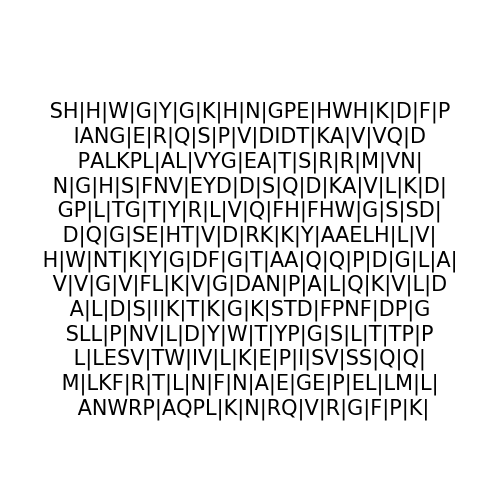

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
%matplotlib notebook
fig = plt.figure(figsize=(5,5))
text = fig.text(0.5, 0.5, annotated,
                ha='center', va='center', size=15)
# text.set_path_effects([path_effects.Normal()])
plt.show()

In [7]:
annotated

' \n SH|H|W|G|Y|G|K|H|N|GPE|HWH|K|D|F|P \n IANG|E|R|Q|S|P|V|DIDT|KA|V|VQ|D \n PALKPL|AL|VYG|EA|T|S|R|R|M|VN| \n N|G|H|S|FNV|EYD|D|S|Q|D|KA|V|L|K|D| \n GP|L|TG|T|Y|R|L|V|Q|FH|FHW|G|S|SD| \n D|Q|G|SE|HT|V|D|RK|K|Y|AAELH|L|V| \n H|W|NT|K|Y|G|DF|G|T|AA|Q|Q|P|D|G|L|A| \n V|V|G|V|FL|K|V|G|DAN|P|A|L|Q|K|V|L|D \n A|L|D|S|I|K|T|K|G|K|STD|FPNF|DP|G \n SLL|P|NV|L|D|Y|W|T|YP|G|S|L|T|TP|P \n L|LESV|TW|IV|L|K|E|P|I|SV|SS|Q|Q| \n M|LKF|R|T|L|N|F|N|A|E|GE|P|EL|LM|L| \n ANWRP|AQPL|K|N|RQ|V|R|G|F|P|K|'